# Topological Data Analysis

#### a. Imports

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval
import collections 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from matplotlib import cm



In [ ]:
# get data previously collected
df1 = pd.read_csv("drive/MyDrive/ProjetSemestreLHST/arks_final.csv",index_col=0, header=None)
df2 = pd.read_csv("drive/MyDrive/ProjetSemestreLHST/arks_final_2.csv",index_col=0,header = None)
df3 = pd.read_csv("drive/MyDrive/ProjetSemestreLHST/arks_final_local.csv",index_col=0,header= None)
df4 = pd.read_csv("drive/MyDrive/ProjetSemestreLHST/arks_final_local_2.csv",index_col=0,header=None)
df5 = pd.read_csv("drive/MyDrive/ProjetSemestreLHST/arks_final_local_3.csv",index_col=0,header=None)
df = pd.concat([df1,df2,df3,df4,df5])
df=df.sort_index()
df = df.rename(columns={1: "Theme", 2: "Year", 3: "Title", 4: "Language" })


# get data previously collected
df_2 = pd.read_csv("drive/MyDrive/PDS2/first_chunk_300_1000_full.csv",index_col=0, header=None)
df_2 = df_2.rename(columns={1: "Ark", 2: "Date", 3: "Country", 4: "City", 5: "len", 6:"Theme", 7:"Year", 8:"Title", 9:"Language" })
df_2.shape

df = pd.concat([df,df_2[["Theme","Year","Title","Language"]]]).reset_index()

# get data previously collected
colnames=['Theme', 'Year', 'Title', 'Language'] 

df1 = pd.read_csv("drive/MyDrive/PDS2/1200to1400_done.csv",index_col=0, header = None, names = colnames)
df2 = pd.read_csv("drive/MyDrive/PDS2/1400to1600_done.csv",index_col=0,header = None,names = colnames)
df3 = pd.read_csv("drive/MyDrive/PDS2/1600to1800_done.csv",index_col=0,header = None,names = colnames)
df4 = pd.read_csv("drive/MyDrive/PDS2/1800to2000_done_3500+.csv",index_col=0,header = None,names = colnames)
df5 = pd.read_csv("drive/MyDrive/PDS2/1800to2000_done.csv",index_col=0,header = None,names = colnames)

# Combine dataframes
df = pd.concat([df,df1,df2,df3,df4,df5])
df = (df.reset_index())
df = df[["Theme","Year","Title","Language"]]

# drop duplicates
df = df.loc[df.astype(str).drop_duplicates().index]

df = (df.reset_index())
df = df[["Theme","Year","Title","Language"]]
df.shape

In [ ]:
# change content of dataframe to list
df.Theme = df.Theme.apply(literal_eval)
df.Year = df.Year.apply(literal_eval)
df.Title = df.Title.apply(literal_eval)
df.Language = df.Language.apply(literal_eval)
df.head()

,Theme,Year,Title,Language
0,"[, Droit, , , , Christianisme Théologie chréti...","[1872, 1835, , 1845, 1887, 1910-1926, 1890, 18...","[Théâtre des Variétés, Dupuis et Céline Chaumo...","[fre, fre, , fre, ita, fre, fre, fre, fre, fre..."
1,"[, , Musique, Musique, Musique, Littérature de...","[, , 18.., 1792, 1842, 1816, 1999, 1824, 1813,...","[, , Le chansonnier bachique de l'amour et de ...","[, , fre, fre, fre, fre, fre, fre, fre, fre, f..."
2,"[, , Technologie (Sciences appliquées), Médias...","[1670, , 1899, 1912-12-13, 1899, 1912-12-13, 1...",[Veüe et perspective du Jardin des trois bassi...,"[fre, , fre, fre, fre, fre, fre, fre, fre, fre..."
3,"[Publications en série d’ordre général, Économ...","[1886, 1922-04-06, 1907-09-19, 1886, 1911-01-0...","[Le Journal des sçavans, Bulletin de la cote /...","[fre, fre, fre, fre, fre, fre, fre, fre, fre, ..."
4,"[Loisirs et arts du spectacle. Sports, Médias ...","[1836-01-28, 1856-07-24, 1851-11-30, 1866-07-0...","[Gazette des théâtres : journal des comédiens,...","[fre, fre, fre, fre, fre, ita, fre, ita, fre, ..."


## 1. Word2vec

#### a) Generating corpus

In [ ]:
# get lists containing themes and century
def get_zipped_list(dataframe):
    # zip lists from theme column and century column
    temp = list(zip(dataframe['Theme']))
    
    # filter only by themes
    temp = list(filter(lambda e: e[0]!='',temp))
    
    # put everything in a string to construct our corpus
    temp = [" ".join(item) for item in temp]
    return temp

In [ ]:
themes_decades = df.apply(lambda x: get_zipped_list(x),axis=1)

In [ ]:
clean_themes = df.apply(lambda x:  list(filter(lambda theme: theme != '',x['Theme'])) ,axis = 1)

In [ ]:
# Create the list of list format of the custom corpus for gensim modeling 
corpus = [row for row in themes_decades]

#### b) word2vec representation

In [ ]:
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(corpus, min_count=1,size= 200,workers=10, window =5, sg = 1)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt
import matplotlib as mpl

vocab = list(model.wv.vocab)
X = model.wv[vocab]




In [ ]:
tsne = TSNE(n_components=3,perplexity =   10)
X_tsne = tsne.fit_transform(X)
df1 = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y',"z"])

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=df1['x'],y=df1['y'],z=df1["z"],text=df1.index, width=2000, height=2000)
fig.update_traces(textposition='top center')
fig.write_html("drive/MyDrive/ProjetSemestreLHST/PCATSNE.html")
fig.show()

## 2. TDA

In [ ]:
# Get rid of empty paths
themes_decades_2 = themes_decades[themes_decades.map(lambda d: len(d)) > 0]



In [ ]:
themes_decades_2 = themes_decades_2.reset_index(drop=True)

#### b) PCA to reduce dimensions

In [ ]:
# imports
from sklearn.decomposition import PCA


In [ ]:
# Finding a PCA that captures 85% of variance

Text(0.5, 1.0, 'Finding suitable number of components')

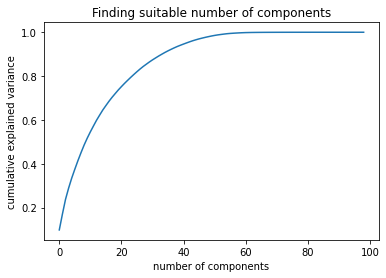

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Finding suitable number of components")

In [ ]:
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(X)

In [ ]:
df1 = pd.DataFrame(principalComponents, index=vocab)


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity = 10)



In [ ]:
# Change paths from themes to vectors
def create_path_from_word2vec(path):
    path_temp = []
    for p in path:
        path_temp.append(list(df1.loc[p]))
    return np.array(path_temp)

paths = themes_decades_2.apply(lambda x: create_path_from_word2vec(x))
        

#### c) generate persistence diagrams

In [ ]:
point_clouds_basic = paths

In [ ]:
from gtda.homology import VietorisRipsPersistence

# Track connected components, loops, and voids ---- betty numbers
homology_dimensions = [0, 1, 2]

# Collapse edges to speed up H2 persistence calculation!
persistence = VietorisRipsPersistence(
    metric="euclidean",
    homology_dimensions=homology_dimensions,
    n_jobs=6,
    collapse_edges=True,
)

diagrams_basic = persistence.fit_transform(list(point_clouds_basic))

In [ ]:
# from gtda.diagrams import NumberOfPoints
# from gtda.diagrams import Amplitude
# from sklearn.pipeline import make_union

# # Select a variety of metrics to calculate amplitudes
# metrics = [
#     {"metric": metric}
#     for metric in ["bottleneck", "wasserstein", "landscape", "persistence_image"]
# ]

# # Concatenate to generate 3 + 3 + (4 x 3) = 18 topological features
# feature_union = make_union(
#     PersistenceEntropy(normalize=True),
#     NumberOfPoints(n_jobs=-1),
#     *[Amplitude(**metric, n_jobs=-1) for metric in metrics]
# )

In [ ]:
from gtda.diagrams import PersistenceEntropy

persistence_entropy = PersistenceEntropy()

# calculate topological feature matrix
X_basic = persistence_entropy.fit_transform(diagrams_basic)

#X_basic = feature_union.fit_transform(diagrams_basic) 

# expect shape - (n_point_clouds, n_homology_dims)
X_basic.shape

(55479, 3)

#### d) create clusters

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(themes_decades, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(64936, 200)

In [ ]:
total_size = df.size

In [ ]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """

    inertias = 0
    cluster_inertias = []
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_:0.2f}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )

        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Percentage Of Total Size:{s[1]*100/X_basic.shape[0]:.1f}% | Avg:{s[2]:.2f} "
            )
    return km, km.labels_,km.inertia_,silhouette_values,silhouette_score(X, km.labels_)

In [ ]:
  clustering, cluster_labels,inertia,clusters_silhouette,sil = mbkmeans_clusters(
    X=X_basic,
      k=8,
      mb=4000,
      print_silhouette_values=True,
  )

For n_clusters = 8
Silhouette coefficient: 0.70
Inertia:4984.73
Silhouette values:
    Cluster 0: Size:4521 | Percentage Of Total Size:8.1% | Avg:0.86 
    Cluster 1: Size:9267 | Percentage Of Total Size:16.7% | Avg:1.00 
    Cluster 2: Size:6806 | Percentage Of Total Size:12.3% | Avg:0.53 
    Cluster 3: Size:12636 | Percentage Of Total Size:22.8% | Avg:0.50 
    Cluster 4: Size:6687 | Percentage Of Total Size:12.1% | Avg:1.00 
    Cluster 5: Size:8648 | Percentage Of Total Size:15.6% | Avg:0.41 
    Cluster 6: Size:1792 | Percentage Of Total Size:3.2% | Avg:0.39 
    Cluster 7: Size:5122 | Percentage Of Total Size:9.2% | Avg:0.96 


In [ ]:
# cluster_stats = {}
# for i in range(2,12):
#   clustering, cluster_labels,inertia,clusters_silhouette,sil = mbkmeans_clusters(
#     X=X_basic,
#       k=i,
#       mb=4000,
#       print_silhouette_values=True,
#   )
#   cluster_stats[i]=[sil,inertia,clusters_silhouette]

For n_clusters = 2
Silhouette coefficient: 0.64
Inertia:42606.43
Silhouette values:
    Cluster 0: Size:21076 | Percentage Of Total Size:38.0% | Avg:0.68 
    Cluster 1: Size:34403 | Percentage Of Total Size:62.0% | Avg:0.61 
For n_clusters = 3
Silhouette coefficient: 0.58
Inertia:22881.92
Silhouette values:
    Cluster 0: Size:15954 | Percentage Of Total Size:28.8% | Avg:0.75 
    Cluster 1: Size:24387 | Percentage Of Total Size:44.0% | Avg:0.45 
    Cluster 2: Size:15138 | Percentage Of Total Size:27.3% | Avg:0.60 
For n_clusters = 4
Silhouette coefficient: 0.61
Inertia:14173.71
Silhouette values:
    Cluster 0: Size:15954 | Percentage Of Total Size:28.8% | Avg:0.73 
    Cluster 1: Size:17961 | Percentage Of Total Size:32.4% | Avg:0.57 
    Cluster 2: Size:12628 | Percentage Of Total Size:22.8% | Avg:0.63 
    Cluster 3: Size:8936 | Percentage Of Total Size:16.1% | Avg:0.45 
For n_clusters = 5
Silhouette coefficient: 0.58
Inertia:11392.76
Silhouette values:
    Cluster 0: Size:12521 

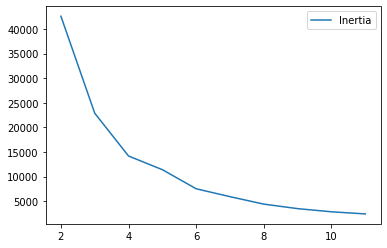

In [ ]:
# plot inertia shape
df_clusterstats=pd.DataFrame(data=cluster_stats)
df_clusterstats.columns = ['Silhouette_value','Inertia','Silhouette_by_cluster']
df_clusterstats.plot(y='Inertia');

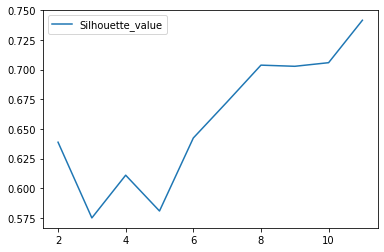

In [ ]:
# plot silhouette value shape
df_clusterstats.plot(y='Silhouette_value');

In [ ]:
df_tda_clusters = pd.DataFrame({
    "text": themes_decades_2,
    "cluster": cluster_labels
})

#### e) projection onto 2d plane and visualizing clusters

In [ ]:
tsne = TSNE(n_components=2,perplexity = 5)


In [ ]:
cluster_nr = 1
member_nr = 0

In [ ]:
# filter dataframe by cluster nr
df_cluster = df_tda_clusters[df_tda_clusters["cluster"]==cluster_nr]

# get specific member of cluster
path_points = df1.loc[set(df_cluster.iloc[member_nr].text)]

# filter dataframe by cluster nr
df_cluster = df_tda_clusters[df_tda_clusters["cluster"]==cluster_nr]

In [ ]:
# Change paths from themes to vectors
def create_2dpath_from_word2vec_tsne(path):
    path_temp = []
    for p in path:
        path_temp.append(list(df1.loc[p]))
    return np.array(path_temp)

paths_2d = themes_decades_2.apply(lambda x: create_2dpath_from_word2vec_tsne(x))

In [ ]:
clustering.cluster_centers_[0]

In [ ]:
df_tda_clusters["documents_visited"]= df_tda_clusters["text"].apply(lambda x: len(x))

In [ ]:
df_tda_clusters["unique_themes"]= df_tda_clusters["text"].apply(lambda x: pd.Series(x).nunique())

In [ ]:
df_tda_clusters

In [ ]:
# funnction to visualize cluster members
def visualize_cluster_member(cluster_nr,member_nr,annotate = True, figsize = 8):
    cluster_nr = cluster_nr
    member_nr = member_nr
    annotate = annotate
    
    
    # filter dataframe by cluster nr
    df_cluster = df_tda_clusters[df_tda_clusters["cluster"]==cluster_nr]
    
    # get specific member of cluster
    path_points = df1.loc[set(df_cluster.loc[member_nr].text)]
    # project points of path using TSNE
    
    try:
        path_points_tsne = tsne.fit_transform(path_points)
        proj =  pd.DataFrame(path_points_tsne,index= path_points.index, columns = ['x','y'])
    except:
        proj = pd.DataFrame([[0,0]], index=path_points.index, columns=list('xy'))
    
    # convert path into 2d coordinates
    path_2d = list(map(lambda x: list(proj.loc[x]), df_cluster.loc[member_nr].text))

    
    # plot
    fig = plt.figure(figsize=(figsize,figsize))
    ax = fig.add_subplot(1, 1, 1)


    # scatter points
    proj.plot('x', 'y', kind='scatter', ax=ax)
    if(annotate):
        for k, v in proj.iterrows():
            ax.annotate(k, v)

    ax.scatter(proj['x'], proj['y'])
    mapa = cm.get_cmap('viridis', 1)

    p = path_2d


    x = []
    for ps2 in p:
        x.append(ps2[0])
    y = []
    for ps2 in p:
        y.append(ps2[1])


    y = np.array(y)
    x = np.array(x)

    try:
        a1 = plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1,width = 0.005,alpha=.3 )
    except:
        print("only 1 theme visited")



        
    title = "Cluster "+ str(cluster_nr) + " Member " + str(member_nr)
    path = "c"+str(cluster_nr)+"m"+str(member_nr)
    plt.title(title)
    #plt.savefig("TDA_advanced/"+path+".png")
    plt.show()



    

In [ ]:
# visualize cluster members closest to the centroid of the cluster, to visualize different clusters change the CLUSTER variable
# to show more than 10 members, change the argument in the argsort
# to annotate each point in the path drawn, change annotate to True
CLUSTER = 2
d = clustering.transform(X_basic)[:, CLUSTER]
ind = np.argsort(d)[::][:10]


for i in ind:
    visualize_cluster_member(CLUSTER,df_tda_clusters.iloc[i].name,annotate = False, figsize = 3)
    plt.show()
    


#### Second method: TSNE last

#### a) get unique high level clusters

In [ ]:
# dictionary of gallica themes, useful to interpret results from Gallica API queries
dewey_classification = {}
dewey_classification_reverse = {}
f = open("drive/MyDrive/ProjetSemestreLHST/dewey.txt", "r",encoding='utf-8')
for x in f:
    try:
        if(x[2:4]=='0 '):
            dewey_classification[x[0:2]]= x[4:].rstrip()
            dewey_classification_reverse[x[4:-1]]= x[0:2].rstrip()
    except:
        continue
        
        

index_to_themes=dewey_classification

In [ ]:
def get_high_level_classification(dewey):
    l = []
    for d in dewey:
        l.append(index_to_themes.get((dewey_classification_reverse.get(d))[:-1]+"0"))
    return l
        

In [ ]:
df_tda_clusters["documents_visited"]= df_tda_clusters["text"].apply(lambda x: len(x))
df_tda_clusters["unique_themes"]= df_tda_clusters["text"].apply(lambda x: pd.Series(x).nunique())
df_tda_clusters["high_level_themes"] = df_tda_clusters["text"].apply(lambda x: get_high_level_classification(x))
df_tda_clusters["unique_high_level_themes"]= df_tda_clusters["high_level_themes"].apply(lambda x: pd.Series(x).nunique())


In [ ]:
df_tda_clusters.groupby(by="cluster").mean()

,documents_visited,unique_themes,unique_high_level_themes
cluster,,,
0,9.325149,3.849148,2.880779
1,7.141686,1.000000,1.000000
2,23.663532,11.390097,6.227887
3,20.251108,9.657882,5.735992
4,5.999252,1.963063,1.683864
5,13.406221,5.794750,4.052960
6,28.997210,14.047991,6.875558
7,7.207927,2.955486,2.352011


#### b) TSNE last

In [ ]:
def visualize_cluster_member_bypop(cluster_nr,member_nr,annotate = True, figsize = 8):
    cluster_nr = cluster_nr
    member_nr = member_nr
    annotate = annotate
    
    
    # filter dataframe by cluster nr
    df_cluster = df_tda_clusters[df_tda_clusters["cluster"]==cluster_nr]
    
    

    # convert path into 2d coordinates
    path_2d = paths_2d[member_nr]
    
    # plot
    fig = plt.figure(figsize=(figsize,figsize))
    ax = fig.add_subplot(1, 1, 1)
    
    #ax.scatter(df_tsne['x'], df_tsne['y'], s = 5)


    mapa = cm.get_cmap('viridis', 1)

    p = path_2d
    
    df_temp = pd.DataFrame(data=path_2d,columns=['x','y'],index=themes_decades_2[member_nr])
    ax.scatter(df_temp['x'], df_temp['y'], s = 8, color = "red")
    if(annotate):
        for k, v in df_temp.iterrows():
            ax.annotate(k, v)


    x = []
    for ps2 in p:
        x.append(ps2[0])
    y = []
    for ps2 in p:
        y.append(ps2[1])


    y = np.array(y)
    x = np.array(x)

    try:
        a1 = plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1,width = 0.008,alpha=.4 )
    except:
        print("only 1 theme visited")



        
    title = "Cluster "+ str(cluster_nr) + " Member " + str(member_nr)
    path = "ca"+str(cluster_nr)+"m"+str(member_nr)
    plt.title(title)
    #plt.savefig("drive/MyDrive/PDS2/TDA_basic_3_annotated/"+path+".png", bbox_inches="tight")
    plt.show()

    

In [ ]:
tsne = TSNE(n_components=2,perplexity = 5)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])


# Change paths from themes to vectors
def create_2dpath_from_word2vec_tsne(path):
    path_temp = []
    for p in path:
        path_temp.append(list(df_tsne.loc[p]))
    return np.array(path_temp)

paths_2d = themes_decades_2.apply(lambda x: create_2dpath_from_word2vec_tsne(x))
     


In [ ]:
# visualize cluster members closest to the centroid of the cluster, to visualize different clusters change the CLUSTER variable
# to show more than 10 members, change the argument in the argsort
# to annotate each point in the path drawn, change annotate to True
CLUSTER = 7

d = clustering.transform(X_basic)[:, CLUSTER]
ind = np.argsort(d)[::][:10]
for i in ind:
    visualize_cluster_member_bypop(CLUSTER,df_tda_clusters.iloc[i].name,annotate = True, figsize = 10)
    plt.show()